# Credit Card churn prediction

# import libraries

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

## Importing Data

In [545]:
df = pd.read_csv('BankChurners.csv/BankChurners.csv')
df = df[df.columns[:-2]]

In [547]:
df.head()
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [147]:
df.isnull().sum()
# bravo since we don't have any null values 

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Exploratory Data Analysis

(array([2.650e+02, 6.540e+02, 1.478e+03, 1.778e+03, 2.422e+03, 1.920e+03,
        9.210e+02, 5.350e+02, 1.520e+02, 2.000e+00]),
 array([26. , 30.7, 35.4, 40.1, 44.8, 49.5, 54.2, 58.9, 63.6, 68.3, 73. ]),
 <BarContainer object of 10 artists>)

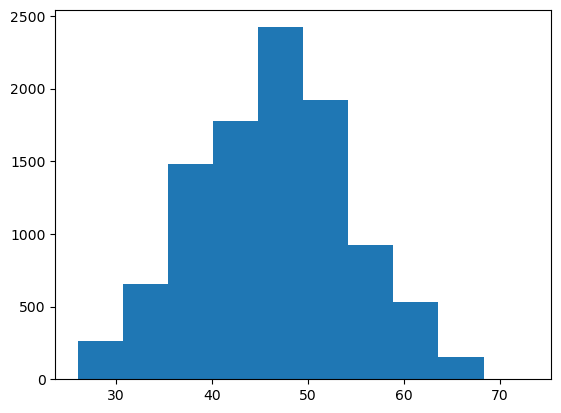

In [155]:
# Customer_Age
plt.hist(df['Customer_Age'],bins = 10)

C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



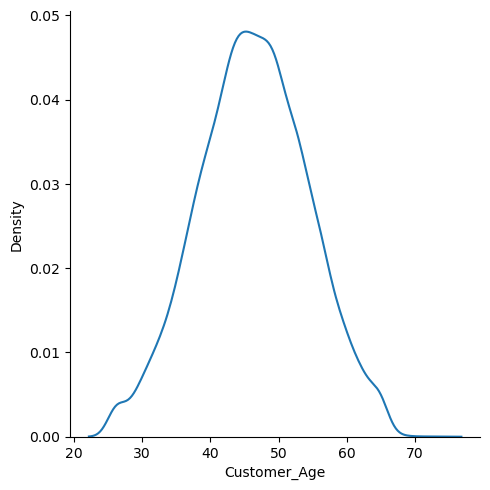

In [168]:
sns.displot(x=df['Customer_Age'],kind="kde")

We can see that the distribution of customer ages in our dataset follows a fairly normal distribution; thus, further use of the age feature can be done with the normality assumption.

<Axes: xlabel='Customer_Age'>

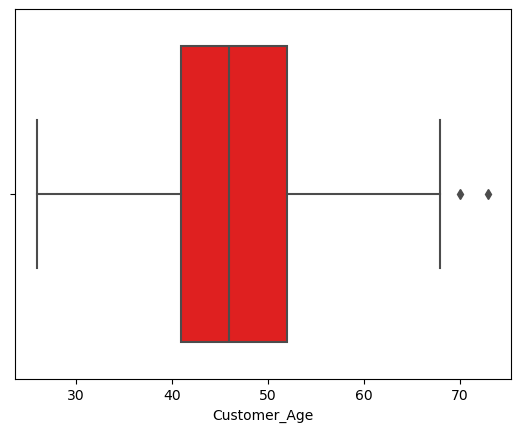

In [178]:
sns.boxplot(data=df, x='Customer_Age',color='r')

<Axes: xlabel='Attrition_Flag'>

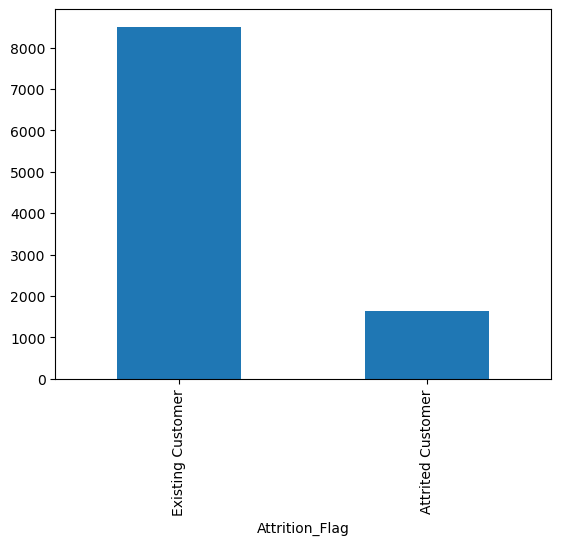

In [196]:
# Attrition Flag ~ Churn
df['Attrition_Flag'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

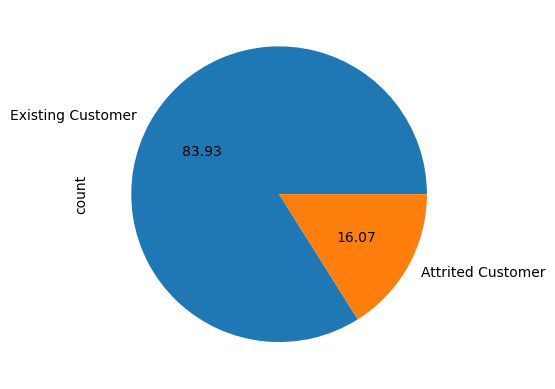

In [216]:
df['Attrition_Flag'].value_counts().plot(kind = 'pie',autopct = '%.2f')

This show us that we have an imbalance data set.

<Axes: xlabel='Gender', ylabel='Card_Category'>

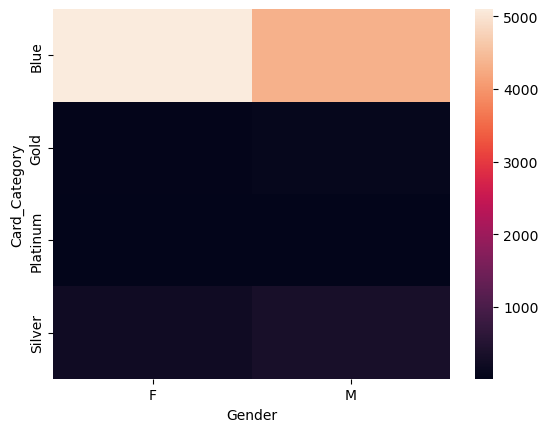

In [235]:
# Distibution of Gender and Different Card 
sns.heatmap(
pd.crosstab(df['Card_Category'],df['Gender']))

In [257]:
pd.crosstab(df['Card_Category'],df['Gender'])

Gender,F,M
Card_Category,,
Blue,5101,4335
Gold,38,78
Platinum,9,11
Silver,210,345


In [245]:
df.Gender.value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

From the above table we can see that most of of the sample is using blue card
Blue Female card useres are greater than Male Blue card Users


<Axes: xlabel='Dependent_count'>

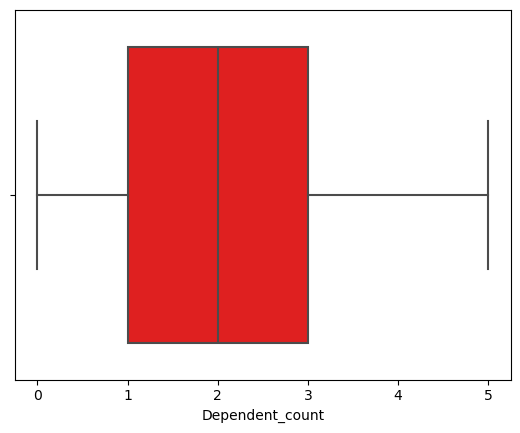

In [304]:
# Dependent_count 
sns.boxplot(data=df,x ='Dependent_count',color='r')


C:\Users\Khan2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Dependent_count', ylabel='Count'>

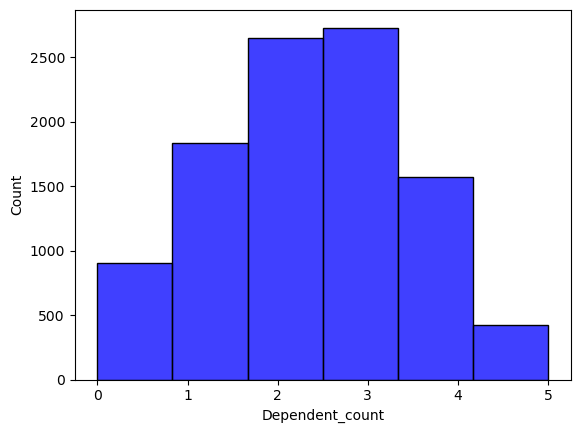

In [333]:
sns.histplot(df['Dependent_count'],bins=6,color='b')

The distribution of Dependent counts is fairly normally distributed with a slight skew.

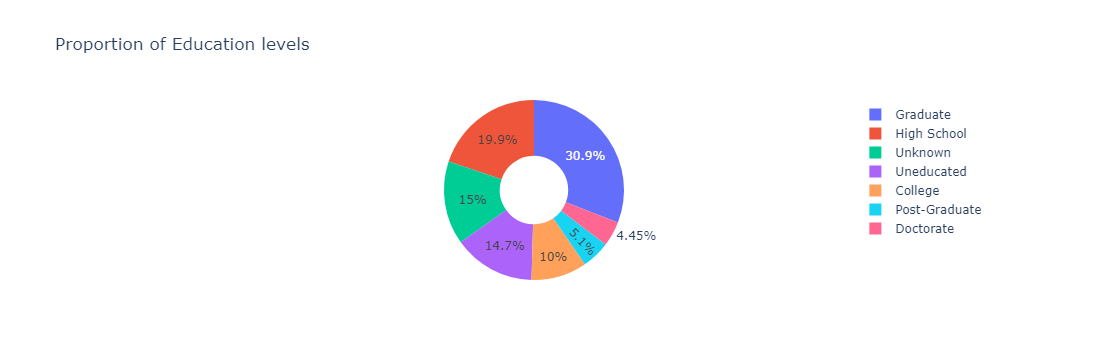

In [348]:
# Education Level
ex.pie(df,names='Education_Level',title='Proportion of Education levels',hole = 0.38)

From the above graph we can state that more than 70% of the customers have a formal education level . About 35% have a higher level of education

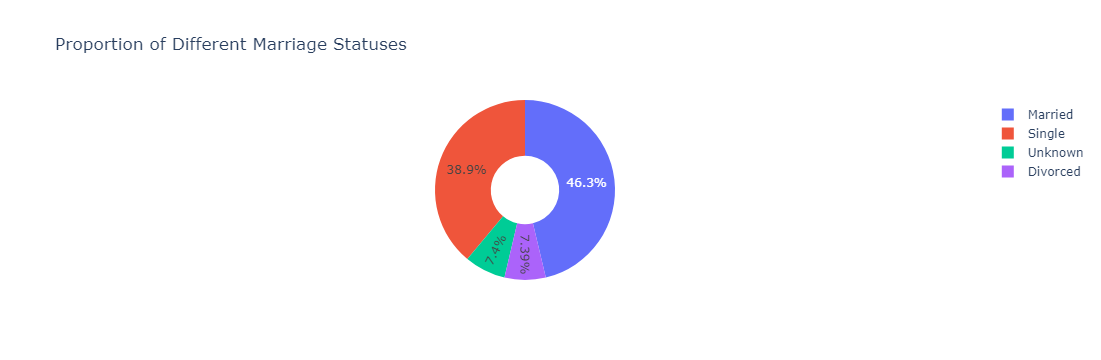

In [362]:
# Marraige Status
ex.pie(df,names='Marital_Status',title='Proportion of Different Marriage Statuses ',hole=0.38)

Almost half of the bank customers are married , and interestingly enough, almost the entire other half are single customers.
only about 70% of the customers are divorced, which is surprising considering the worldwide divorce rate statistics!(😁)

<Axes: title={'center': 'Proportion Of Different Income Levels '}, ylabel='count'>

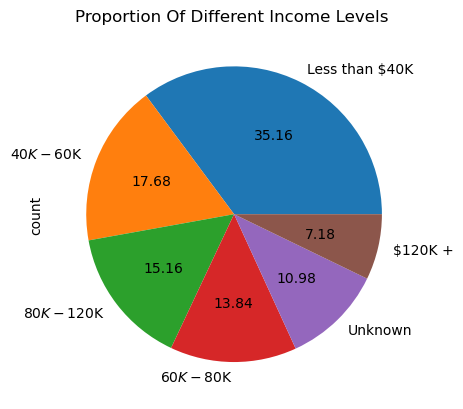

In [399]:
# Income_Category
df['Income_Category'].value_counts().plot(kind = 'pie',autopct = '%.2f',title = 'Proportion Of Different Income Levels ')

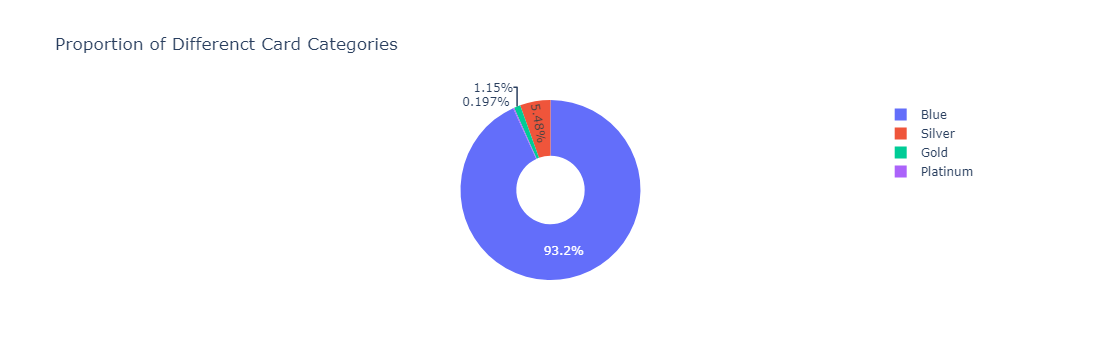

In [403]:
# Card Categories
ex.pie(df,names='Card_Category',title='Proportion of Differenct Card Categories',hole = 0.38)

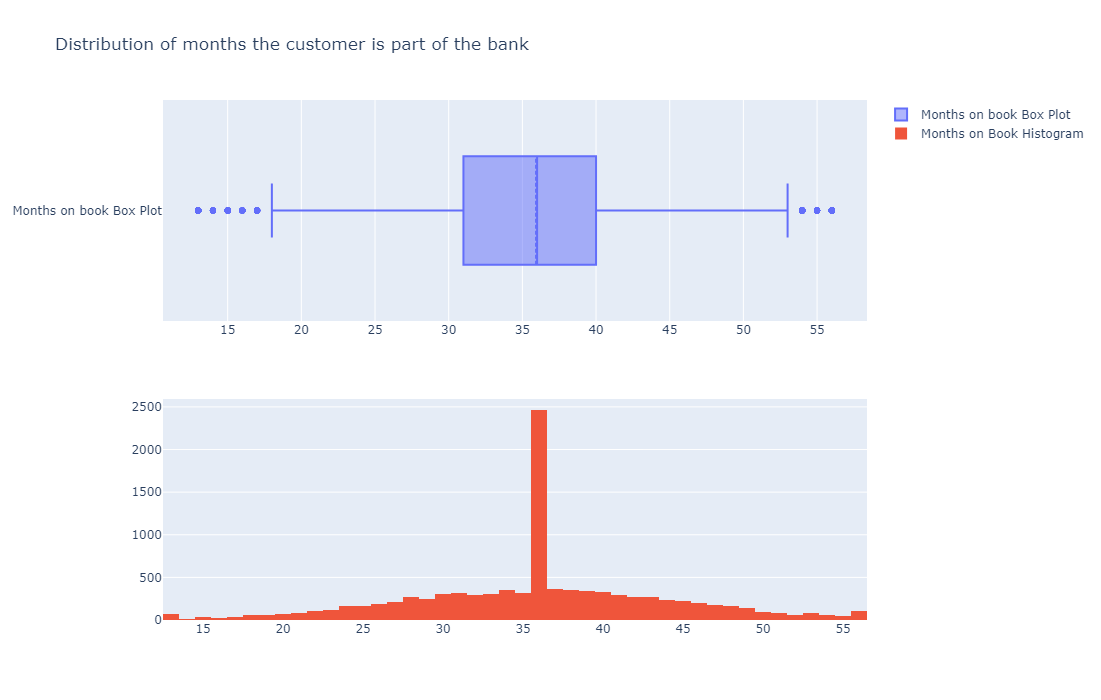

In [435]:
# Month The customer is part of the bank -- Months_on_book column
fig = make_subplots(rows=2,cols=1)

tr1 = go.Box(x = df['Months_on_book'],name = 'Months on book Box Plot',boxmean=True)
tr2 = go.Histogram(x = df['Months_on_book'] ,name='Months on Book Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)
fig.update_layout(height = 700,width = 1000, title_text = 'Distribution of months the customer is part of the bank')
fig.show()

In [426]:
print('Kurtosis of Months on book features is : {}'.format(df['Months_on_book'].kurt()))

Kurtosis of Months on book features is : 0.40010012019986707


We have a low kurtosis value pointing to a very flat shaped distribution, which means we cannot assume normlaity of the feature

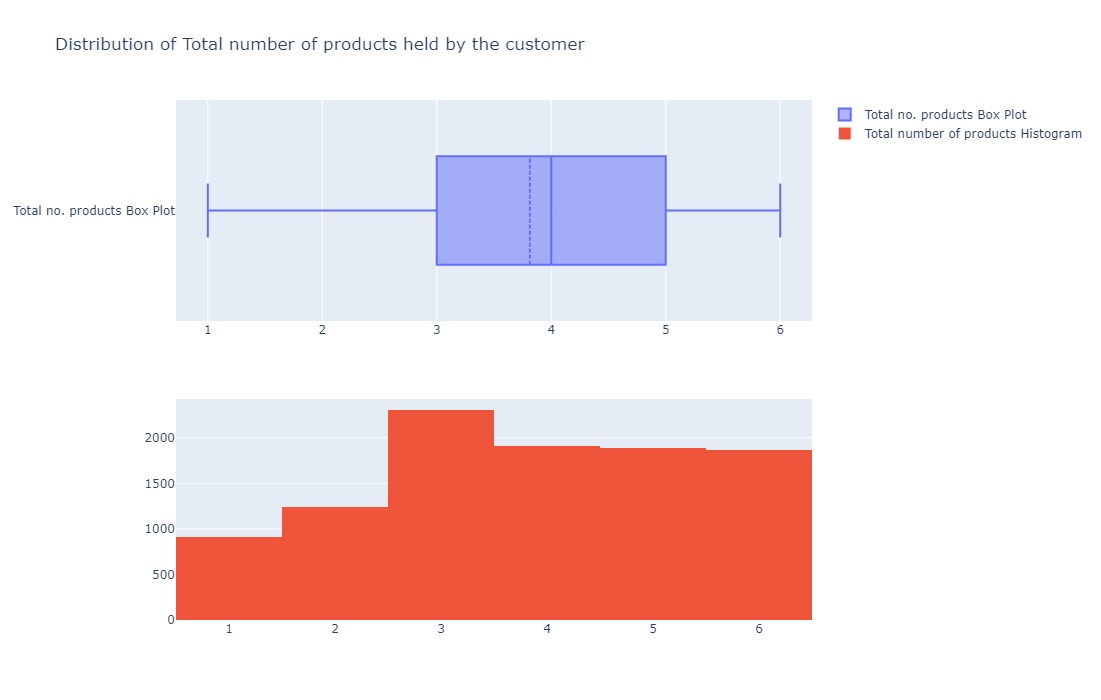

In [433]:
# Month The total number of products held by the customer -- Total_Relationship_count
fig = make_subplots(rows=2,cols=1)

tr1 = go.Box(x = df['Total_Relationship_Count'],name = 'Total no. products Box Plot',boxmean=True)
tr2 = go.Histogram(x = df['Total_Relationship_Count'] ,name='Total number of products Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)
fig.update_layout(height = 700,width = 1000, title_text = 'Distribution of Total number of products held by the customer')
fig.show()

The distrubution of the total number of products held by the customer seems closer to a uniform distribution and may appear
useless as a predictor for churn status

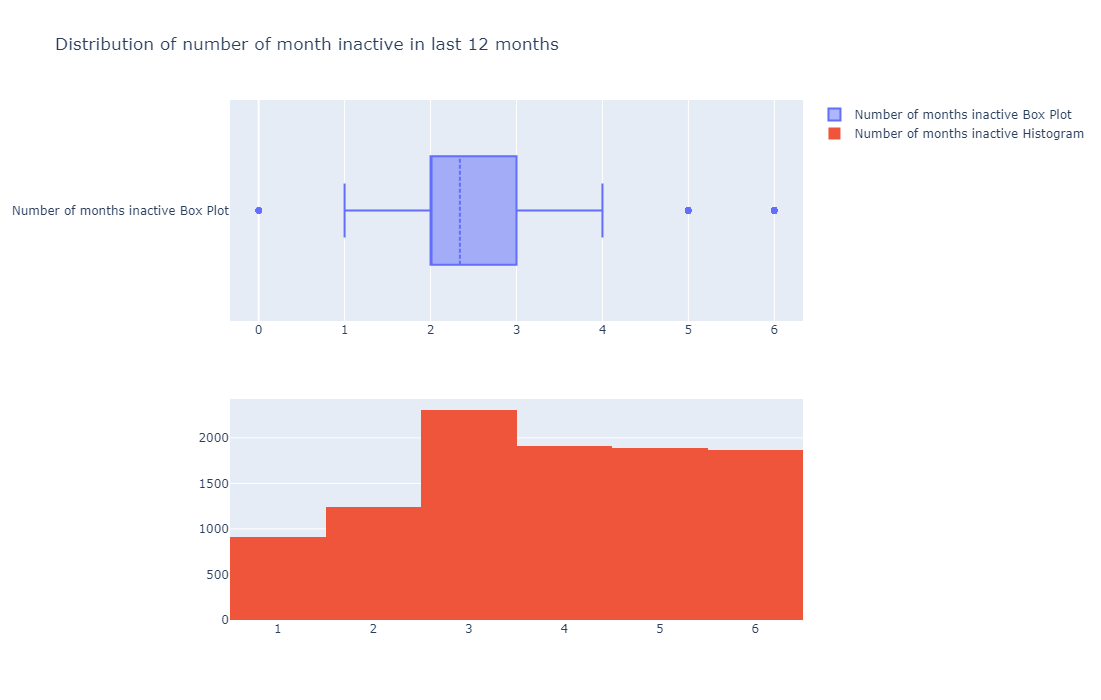

In [440]:
# Number of months inactive in last 12 months
fig = make_subplots(rows=2,cols=1)

tr1 = go.Box(x = df['Months_Inactive_12_mon'],name = 'Number of months inactive Box Plot',boxmean=True)
tr2 = go.Histogram(x = df['Total_Relationship_Count'] ,name='Number of months inactive Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)
fig.update_layout(height = 700,width = 1000, title_text = 'Distribution of number of month inactive in last 12 months ')
fig.show()

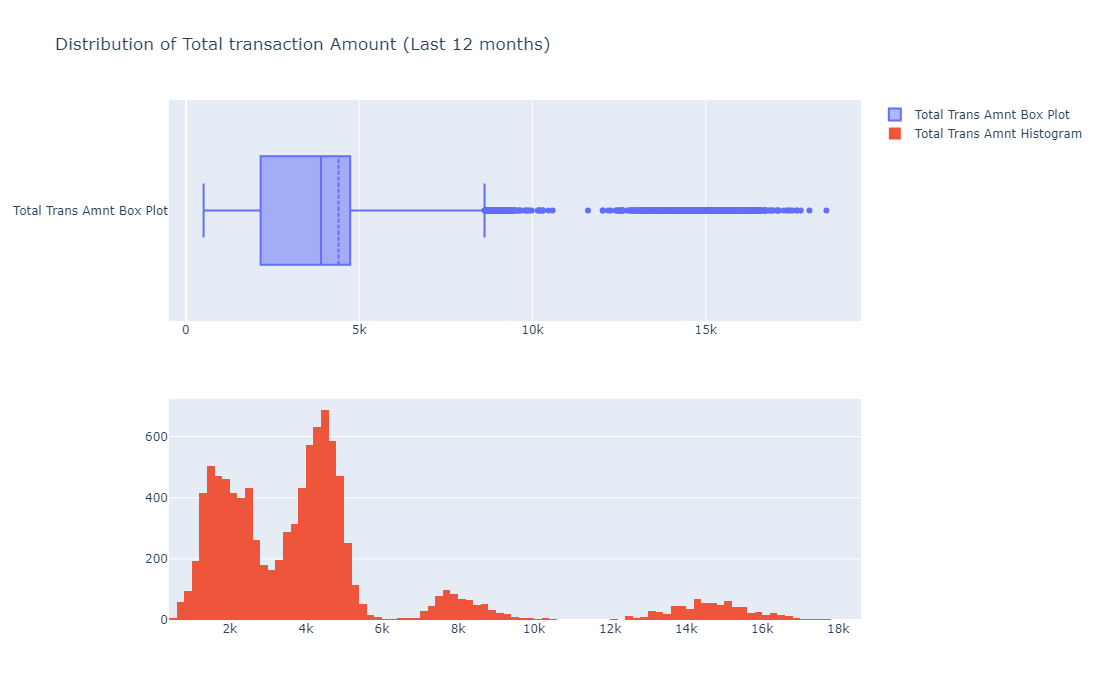

In [442]:
# Total_Trans_Amnt
fig = make_subplots(rows=2,cols=1)

tr1 = go.Box(x = df['Total_Trans_Amt'],name = 'Total Trans Amnt Box Plot',boxmean=True)
tr2 = go.Histogram(x = df['Total_Trans_Amt'] ,name='Total Trans Amnt Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)
fig.update_layout(height = 700,width = 1000, title_text = 'Distribution of Total transaction Amount (Last 12 months)')
fig.show()

We see that the distribution of the total transactions (Last 12 months ) displays a multimodal distribution, meaning we have some underlying groups in our data;
it can be an interesting experiment to try and cluster the different groups and view the similarities between then and what describes best the different 
groups which create the different modes in our distribution

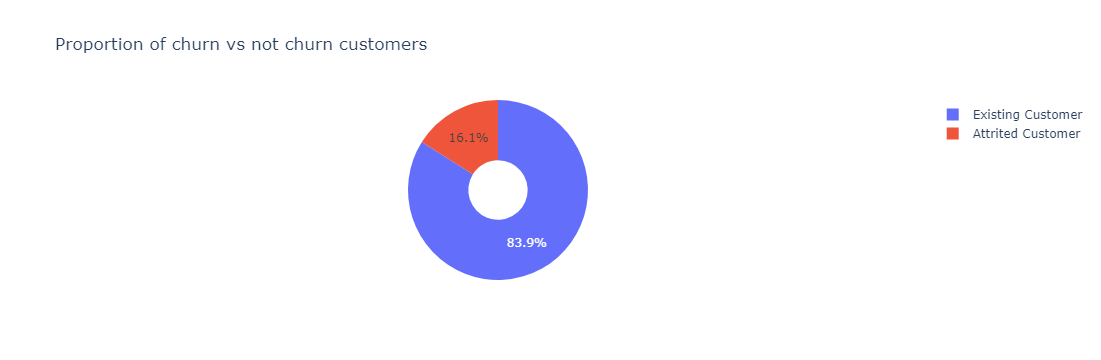

In [445]:
# Attrition_Flag :- Churn Column
ex.pie(df,names='Attrition_Flag',title='Proportion of churn vs not churn customers',hole=0.33)

As we can see, only 16% of the data samples represent churn customers; in the following steps, I will use SMOTE(Synthetic Minority Oversampling Technique)
to upsample the churn samples to match them with regular customer sample size to give the later selected models  a better  chance of catching on small details which will almost definitely
be missed out with such a size difference.

In [450]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# Data Preprocessing

In [549]:
df.Attrition_Flag = c_data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
df.Gender = df.Gender.replace({'F':1,'M':0})

In [551]:
df.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6906,811713408,0,58,1,2,High School,Married,$40K - $60K,Blue,53,...,2,3,2642.0,1249,1393.0,0.682,4897,81,0.723,0.473
7813,714671658,0,38,1,5,Graduate,Married,Less than $40K,Blue,31,...,5,2,2153.0,1392,761.0,0.787,4268,85,0.667,0.647
1049,715588908,0,42,1,4,Graduate,Single,Less than $40K,Blue,32,...,2,3,6158.0,0,6158.0,1.411,3132,66,0.784,0.000
3819,778924158,0,45,1,2,High School,Single,Less than $40K,Blue,26,...,3,4,1438.3,0,1438.3,0.710,3749,77,0.604,0.000
200,720707283,0,48,0,4,Unknown,Married,$80K - $120K,Blue,36,...,3,0,5288.0,866,4422.0,0.869,1777,42,0.750,0.164


In [553]:
# One hot encoding  Education Lvele
df = pd.concat([df,pd.get_dummies(df['Education_Level']).drop(columns = ['Unknown'])],axis = 1)
df = pd.concat([df,pd.get_dummies(df['Income_Category']).drop(columns = ['Unknown'])],axis = 1)
df = pd.concat([df,pd.get_dummies(df['Marital_Status']).drop(columns = ['Unknown'])],axis = 1)
df = pd.concat([df,pd.get_dummies(df['Card_Category']).drop(columns = ['Platinum'])],axis = 1)
df.drop(columns=['Education_Level','Marital_Status','Card_Category','CLIENTNUM','Income_Category'],inplace=True)


In [555]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Divorced', 'Married', 'Single', 'Blue', 'Gold',
       'Silver'],
      dtype='object')

Here We One hot encode all the categorical features describing different statues of a Customer

In [557]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,False,True,False,False,False,True,False,True,False,False
1,0,49,1,5,44,6,1,2,8256.0,864,...,False,False,False,True,False,False,True,True,False,False
2,0,51,0,3,36,4,1,0,3418.0,0,...,False,False,True,False,False,True,False,True,False,False
3,0,40,1,4,34,3,4,1,3313.0,2517,...,False,False,False,True,False,False,False,True,False,False
4,0,40,0,3,21,5,1,0,4716.0,0,...,False,True,False,False,False,True,False,True,False,False


<Axes: >

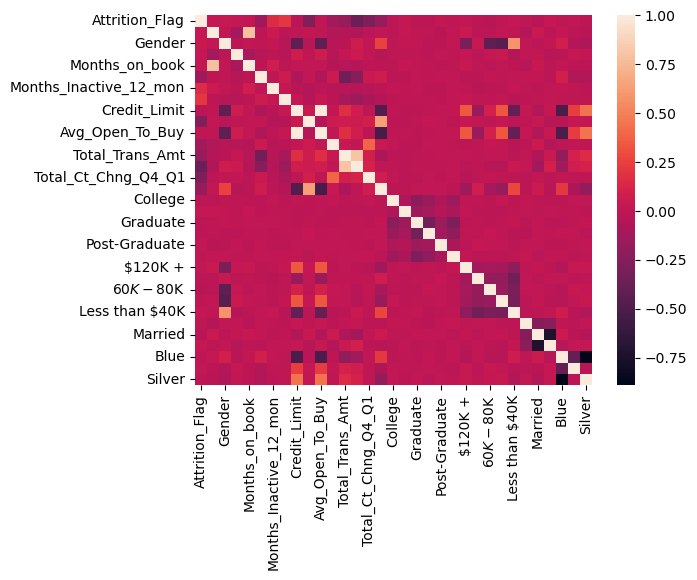

In [565]:
sns.heatmap(df.corr())

In [571]:
# Correalation Matrix
# df.corr()

# Data Upsampling Using SMOTE

In [574]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(df[df.columns[1:]],df[df.columns[0]])
usampled_df = X.assign(Churn = y)

In [603]:
usampled_df.shape

(17000, 16)

In [580]:
usampled_df.Churn.value_counts()

Churn
0    8500
1    8500
Name: count, dtype: int64

In [582]:
ohe_data = usampled_df[usampled_df.columns[15:-1]].copy()
usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])